In [2]:
# Importing all the packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Reading the Excel file
df = pd.read_excel('Strikers_performance.xlsx')
df

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,England,Left-footed,Yes,17.694550,7.156699,39.042650,0.707015,0.240660,0.707748,89.351540,60.284576,28.386885,39.510350,4.448635,0.767147,0.770213,5.999478,12.419711
496,497,Germany,Right-footed,Yes,9.813769,13.393060,39.430525,0.597348,0.186052,0.725775,78.155010,39.221882,15.974141,47.114106,6.742907,0.865265,0.876903,5.967767,8.653989
497,498,England,Left-footed,Yes,14.048307,9.922529,33.458564,0.511813,0.186012,0.575824,69.519115,56.797022,25.384241,71.129102,5.696650,0.628260,0.747261,11.249112,6.329751
498,499,England,Right-footed,Yes,10.621909,6.286463,32.168438,0.583693,0.239519,0.733418,68.168495,76.433782,9.151613,48.080362,2.611235,0.796795,0.799489,1.452370,11.305826


In [4]:
# Checking for missing values within any column
print(df.isnull().sum())

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64


# Data Cleaning

In [5]:
# Imputing the missing values using SimpleImputer

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
nominal_cols = df.select_dtypes(include=['object']).columns.tolist()

median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = median_imputer.fit_transform(df[numeric_cols])
df[nominal_cols] = freq_imputer.fit_transform(df[nominal_cols])

# Checking for missing values again to confirm imputation
print(df.isnull().sum())


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64


In [6]:
# List of columns to be converted to integer type
cols_to_convert_to_int = ['Striker_ID',
    'Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball',
    'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
    'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct'
]

# Converting the specified columns to integer type
for col in cols_to_convert_to_int:
        df[col] = df[col].astype(int)
df.dtypes        


Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [7]:
# Final Dataframe
df.info

<bound method DataFrame.info of      Striker_ID Nationality    Footedness Marital Status  Goals Scored  \
0             1       Spain   Left-footed             No            17   
1             2      France   Left-footed            Yes            14   
2             3     Germany   Left-footed             No            18   
3             4      France  Right-footed             No            22   
4             5      France   Left-footed            Yes            13   
..          ...         ...           ...            ...           ...   
495         496     England   Left-footed            Yes            17   
496         497     Germany  Right-footed            Yes             9   
497         498     England   Left-footed            Yes            14   
498         499     England  Right-footed            Yes            10   
499         500     England   Left-footed             No             8   

     Assists  Shots on Target  Shot Accuracy  Conversion Rate  \
0         10  

# Descriptive Analysis

In [8]:
descriptive_stats = df.describe().round(2)
descriptive_stats

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


# Data Visualisation

Footedness
Right-footed    53.4
Left-footed     46.6
Name: proportion, dtype: float64


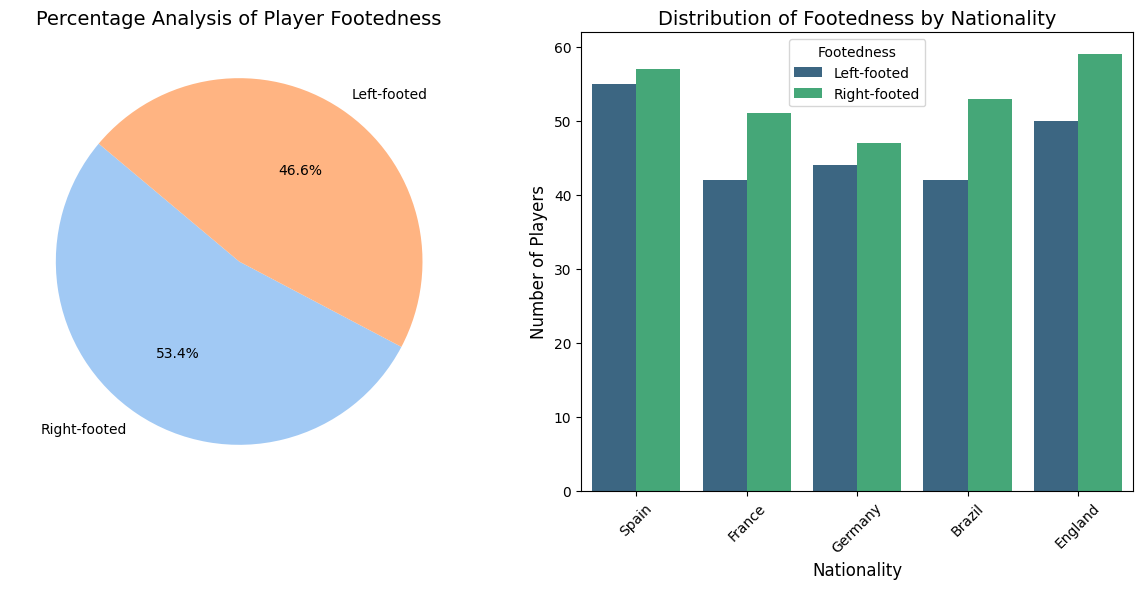

In [9]:
# Calculating the percentage of each category in 'Footedness'
footedness_percentage = df['Footedness'].value_counts(normalize=True) * 100
print(footedness_percentage.round(2))

# Creating the pie chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.pie(footedness_percentage, labels=footedness_percentage.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Percentage Analysis of Player Footedness', fontsize=14)
plt.ylabel('')

# Count Plot for Footedness by Nationality 
plt.subplot(1, 2, 2) 
sns.countplot(x='Nationality', hue='Footedness', data=df, palette='viridis')
plt.title('Distribution of Footedness by Nationality', fontsize=14)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Footedness')

plt.tight_layout()
plt.show()

# Statistical Analysis

In [10]:
df['Conversion Rate'] = 0.0
mask = df['Shots on Target'] > 0

# to update only the rows where the mask is True
df.loc[mask, 'Conversion Rate'] = (df.loc[mask, 'Goals Scored'] / df.loc[mask, 'Shots on Target']) * 100
df['Consistency Rate'] = df['Big Game Performance']

In [11]:
#1 Calculating average goals scored by nationality
avg_goals_by_nationality = df.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending=False).round(2)
print(avg_goals_by_nationality)

Nationality
Brazil     15.32
Spain      14.69
France     14.41
Germany    14.35
England    13.90
Name: Goals Scored, dtype: float64


In [12]:
#2 Calculating average conversion rate by footedness
avg_conversion_by_footedness = df.groupby('Footedness')['Conversion Rate'].mean().round(2)
print(avg_conversion_by_footedness)


Footedness
Left-footed     64.65
Right-footed    63.54
Name: Conversion Rate, dtype: float64


In [13]:
#3 ANOVA Test for Difference in Consistency Among Nationalities 
# Preparing data for tests
nationalities = df['Nationality'].unique()
grouped_by_nat = df.groupby('Nationality')['Consistency Rate']
grouped_data = [group for name, group in grouped_by_nat]

# Assumption Checking

# Shapiro-Wilk Test for Normality Check
for i, nat in enumerate(nationalities):
    shapiro_stat, shapiro_p = stats.shapiro(grouped_data[i])
    print(nat,': p-value =', round(shapiro_p,4))

# Levene's Test for Homogeneity of Variances Check 
levene_stat, levene_p = stats.levene(*grouped_data)
print("Levene's Test p-value: ",round(levene_p,4))

# Performing ANOVA Test 
if levene_p > 0.05: 
    f_stat, p_value = stats.f_oneway(*grouped_data)
    print("Assumptions met. Running One-Way ANOVA...")
    print('ANOVA F-statistic:',round(f_stat,4))
    print("ANOVA p-value:",round(p_value,4))
else:
# If assumptions are not met, a non-parametric test is better
    kruskal_stat, kruskal_p = stats.kruskal(*grouped_data)
    print("Homogeneity of variance assumption not met. Running Kruskal-Wallis Test...")
    print("Kruskal-Wallis H-statistic:", round(kruskal_stat,4))
    print("Kruskal-Wallis p-value:", round(kruskal_p,4))



Spain : p-value = 0.0284
France : p-value = 0.0024
Germany : p-value = 0.0001
Brazil : p-value = 0.0028
England : p-value = 0.0149
Levene's Test p-value:  0.1988
Assumptions met. Running One-Way ANOVA...
ANOVA F-statistic: 1.3015
ANOVA p-value: 0.2684


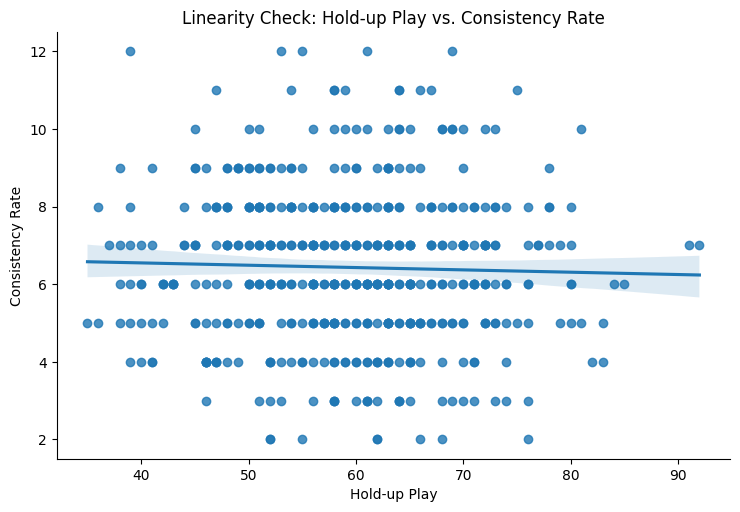

Normality p-value for Hold-up Play: 0.1509
Normality p-value for Consistency Rate: 0.0
Pearson Correlation Results 
Correlation Coefficient: -0.0307
P-value: 0.4933


In [14]:
#4 Correlation Between Hold-up Play and Consistency
# Linearity Check 
sns.lmplot(x='Hold-up Play', y='Consistency Rate', data=df, aspect=1.5)
plt.title('Linearity Check: Hold-up Play vs. Consistency Rate')
plt.show()

# Normality Check (Shapiro-Wilk)
hup_shapiro_stat, hup_shapiro_p = stats.shapiro(df['Hold-up Play'])
con_shapiro_stat, con_shapiro_p = stats.shapiro(df['Consistency Rate'])
print("Normality p-value for Hold-up Play:", round(hup_shapiro_p,4))
print("Normality p-value for Consistency Rate:",round(con_shapiro_p,4))

# Performing Correlation Test 
corr_coeff, p_value = stats.pearsonr(df['Hold-up Play'], df['Consistency Rate'])
print("Pearson Correlation Results ")
print("Correlation Coefficient:",round(corr_coeff,4))
print("P-value:",round(p_value,4))

In [15]:
#5 Performing Simple Linear Regression Analysis
model = smf.ols('Q("Consistency Rate") ~ Q("Hold-up Play")', data=df).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Consistency Rate")   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                    0.4701
Date:                   Sat, 02 Aug 2025   Prob (F-statistic):              0.493
Time:                           18:43:25   Log-Likelihood:                -1050.3
No. Observations:                    500   AIC:                             2105.
Df Residuals:                        498   BIC:                             2113.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

# Feature Engineering

In [16]:
# List of columns to sum for the new feature
contribution_cols = [
    'Goals Scored', 'Assists', 'Shots on Target', 'Dribbling Success',
    'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Consistency'
]
df_new=df.copy()

df_new['Total Contribution Score'] = df_new[contribution_cols].sum(axis=1)
print("'Total Contribution Score'\n")
print(df_new[['Striker_ID', 'Total Contribution Score']].head().round(2))

# Encoding Categorical Variables 
print("\nEncoding 'Footedness' and 'Marital Status' \n")

le = LabelEncoder()
df_new['Footedness_Encoded'] = le.fit_transform(df_new['Footedness'])
print("Original Footedness:", df_new['Footedness'].unique())
print("Encoded Footedness:", df_new['Footedness_Encoded'].unique())

df_new['Marital Status_Encoded'] = le.fit_transform(df_new['Marital Status'])
print("Original Marital Status:", df_new['Marital Status'].unique())
print("Encoded Marital Status:", df_new['Marital Status_Encoded'].unique())


# Creating Dummy Variables for Nationality 
print("\n Creating Dummy Variables for 'Nationality'\n")
nationality_dummies = pd.get_dummies(df_new['Nationality'], prefix='Nationality')
df_new = pd.concat([df_new, nationality_dummies], axis=1)
print("Final DataFrame \n")
print(df_new.head().round(2))


'Total Contribution Score'

   Striker_ID  Total Contribution Score
0           1                    113.58
1           2                    110.60
2           3                     94.43
3           4                    124.25
4           5                    107.29

Encoding 'Footedness' and 'Marital Status' 

Original Footedness: ['Left-footed' 'Right-footed']
Encoded Footedness: [0 1]
Original Marital Status: ['No' 'Yes']
Encoded Marital Status: [0 1]

 Creating Dummy Variables for 'Nationality'

Final DataFrame 

   Striker_ID Nationality    Footedness Marital Status  Goals Scored  Assists  \
0           1       Spain   Left-footed             No            17       10   
1           2      France   Left-footed            Yes            14       13   
2           3     Germany   Left-footed             No            18        3   
3           4      France  Right-footed             No            22        9   
4           5      France   Left-footed            Yes            13   

# Clustering Analysis

 Finding the Optimal Number of Clusters (Elbow Method)



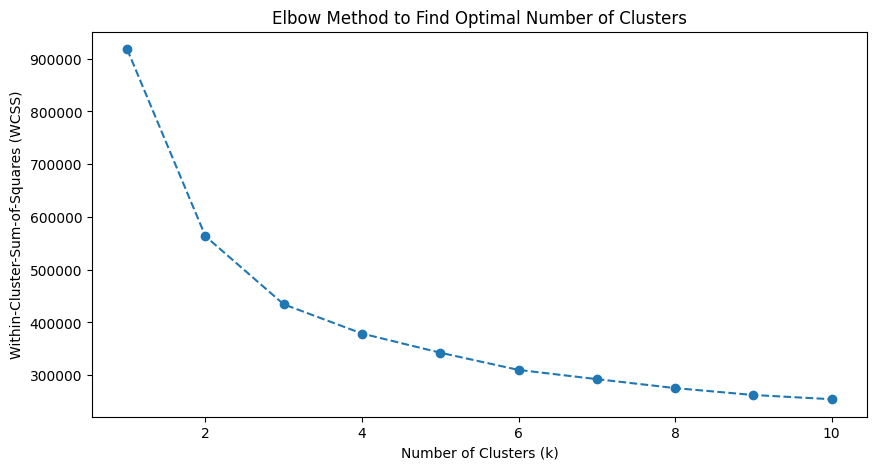


 Building KMeans Model with k=2
Cluster labels have been added to the DataFrame.

   Striker_ID  Total Contribution Score  Clusters
0           1                113.577376         0
1           2                110.600139         0
2           3                 94.433410         0
3           4                124.250575         1
4           5                107.293123         0

 Average Total Contribution Score by Cluster 

Clusters
0    114.71
1    110.64
Name: Total Contribution Score, dtype: float64

Assigning and Mapping Striker Types

Best Striker Cluster: 0

 New column 'Strikers types' created and 'Clusters' column dropped.

Final mapping applied: 'Best strikers' -> 1, 'Regular strikers' -> 0

## Final DataFrame with Striker Types ##

     Striker_ID  Total Contribution Score  Strikers types
0             1                113.577376               1
1             2                110.600139               1
2             3                 94.433410               1
3            

In [22]:
df_clust=df_new.copy()
# using only the numeric features for clustering
features_for_clustering = df_clust.drop(columns=['Striker_ID', 'PlayerName', 'Nationality', 'Footedness', 'Marital Status'], errors='ignore')

# Calculating WCSS and Visualize the Elbow Chart
print(" Finding the Optimal Number of Clusters (Elbow Method)\n")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',  random_state=42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the elbow chart
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

# Building KMeans Model with K=2
print("\n Building KMeans Model with k=2")
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++',  random_state=42)
cluster_labels = kmeans.fit_predict(features_for_clustering)

# Add the cluster labels to the original DataFrame
df_clust['Clusters'] = cluster_labels
print("Cluster labels have been added to the DataFrame.\n")
print(df_clust[['Striker_ID', 'Total Contribution Score', 'Clusters']].head())

# Analyze Clusters by Contribution Score 
print("\n Average Total Contribution Score by Cluster \n")
avg_score_by_cluster = df_clust.groupby('Clusters')['Total Contribution Score'].mean().round(2)
print(avg_score_by_cluster)

# Assigning and Maping 'Strikers types' based on cluster labels 
print("\nAssigning and Mapping Striker Types\n")

best_striker_cluster = avg_score_by_cluster.idxmax()
print("Best Striker Cluster:", best_striker_cluster)
df_clust['Strikers types'] = np.where(df_clust['Clusters'] == best_striker_cluster, 'Best strikers', 'Regular strikers')

df_clust.drop('Clusters', axis=1, inplace=True)
print("\n New column 'Strikers types' created and 'Clusters' column dropped.\n")

# Using feature mapping for the final encoding
strikers_map = {'Best strikers': 1, 'Regular strikers': 0}
df_clust['Strikers types'] = df_clust['Strikers types'].map(strikers_map)
print("Final mapping applied: 'Best strikers' -> 1, 'Regular strikers' -> 0\n")

print("## Final DataFrame with Striker Types ##\n")
final_display_cols = ['Striker_ID', 'Total Contribution Score', 'Strikers types']
print(df_clust[final_display_cols])


# Machine Learning Model (Logistic Regression)

Features (X) and target (y) have been selected.

Shape of X: (500, 24)
Shape of y: (500,)
 
 Scaling and Splitting Data 


 Building and Training the Model 

Logistic Regression model has been successfully trained.


 Evaluating Model Performance 


 Model Accuracy:  97.0 %


 Visualizing the Confusion Matrix 



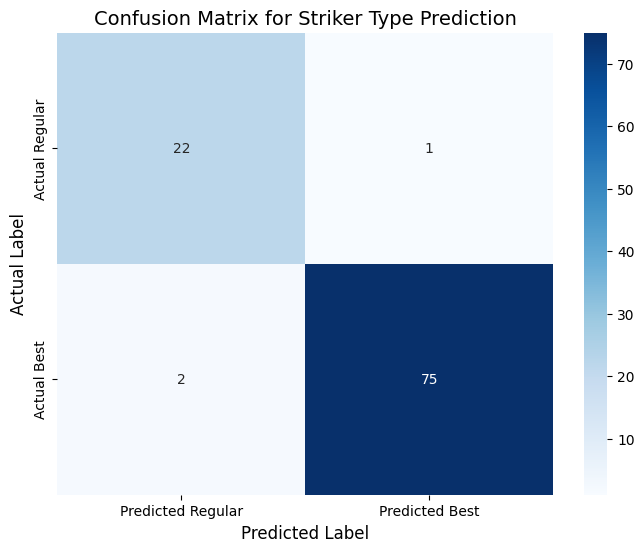

In [23]:
df_model=df_clust.copy()
 
# The target variable is 'Strikers types'
y = df_model['Strikers types']
X = df_model.drop(columns=['Striker_ID', 'Nationality', 'Footedness', 'Marital Status', 'Strikers types'])

print("Features (X) and target (y) have been selected.\n")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Feature Scaling and Train-Test Split 
print(" \n Scaling and Splitting Data \n")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Building and Training the Logistic Regression Model 
print("\n Building and Training the Model \n")
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model has been successfully trained.\n")

# Making Predictions and Evaluating Accuracy 
print("\n Evaluating Model Performance \n")
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy: ",round(accuracy * 100,2),"%\n")


# Create and Visualize the Confusion Matrix 
print("\n Visualizing the Confusion Matrix \n")
cm = confusion_matrix(y_test, y_pred)

# Visualising the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Regular', 'Predicted Best'],
            yticklabels=['Actual Regular', 'Actual Best'])
plt.title('Confusion Matrix for Striker Type Prediction', fontsize=14)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()